<a href="https://colab.research.google.com/github/PARULCHUTANIPC/parul/blob/p1/fmnist_d6.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
torch.set_printoptions(linewidth= 120)
torch.set_grad_enabled(True)
from torch.utils.tensorboard import SummaryWriter

In [0]:

def get_num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).sum().item()

In [0]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self, t):
        # implement the forward pass
        # 1) Input layer
        t=t

        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)

        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)

        # 6) Output Layer
        t = self.out(t)
#t = F.softmax(t, dim=1)

        return t

In [0]:
transform = transform=transforms.Compose([
        transforms.ToTensor()
    ])
train_set = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)

test_set = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_set, batch_size=100,
                                         shuffle=False)

In [34]:
'''
train_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)
'''

"\ntrain_set = torchvision.datasets.FashionMNIST(\n    root='./data'\n    ,train=True\n    ,download=True\n    ,transform=transforms.Compose([\n        transforms.ToTensor()\n    ])\n)\n"

# TRAINING WITH A SINGLE BATCH

In [0]:
network = Network()
train_loader = torch.utils.data.DataLoader(train_set
   ,batch_size=100)
optimizer = optim.Adam(network.parameters(),lr = 0.01)
# Obtain the batch 
batch = next(iter(train_loader))
images, labels = batch
# PASS THE BATCH IN THE NETWORK  --------  network is the name of the class we made..... in which we defined the layers, 1 input, 2 conv, 2 linear and 1 output layer
preds = network(images)
#CALCULATE LOSS
loss = F.cross_entropy(preds, labels)
# CALCULATE GRADIENTS
loss.backward()
# UPDATE WEIGHTS
optimizer.step()

In [36]:
print ('loss1 : ', loss.item()) # it will give the loss when the images are given to the network  first time
# Now, the images are again passed to the network and calculate the loss again and compare
preds = network(images)
loss = F.cross_entropy(preds, labels)
print('loss2 : ', loss.item())

loss1 :  2.297020673751831
loss2 :  2.2573931217193604


**# TRAINING WITH ALL BATCHES / ONE EPOCH**

In [0]:
network = Network()
train_loader = torch.utils.data.DataLoader(train_set
   ,batch_size=100)
optimizer = optim.Adam(network.parameters(),lr = 0.01)
# THIS IS THE SAME AS TRAINING A SINGLE BATCH. IN ADDITION TO THAT , WE HAVE TO APPLY A LOOP SO THAT ALL BATCHES CAN PASS THROUGH THE NETWORK TO GET TRAINED
#####---------------------------
total_loss= 0
total_correct = 0
# Obtain the batch 
#batch = next(iter(train_loader))
#images, labels = batch
# SELECTING ALL BATCHES
for batch in train_loader:
# PASS THE BATCH IN THE NETWORK  --------  network is the name of the class we made..... in which we defined the layers, 1 input, 2 conv, 2 linear and 1 output layer
  preds = network(images)
#CALCULATE LOSS
  loss = F.cross_entropy(preds, labels)
# -------------------- EXTRA LINE ---- SET THE INITIAL GRADIENT ZERO AFTER EVERY ITERATION, OTHERWISE IT WILL ADD UP THE WEIGHT AFTER EVERY STEP WHICH WILL ULTIMATELY RESULT IN BAD ACCURACY, HIGHER LOSS
  optimizer.zero_grad()
# CALCULATE GRADIENTS
  loss.backward()
# UPDATE WEIGHTS  
  optimizer.step()
  ##----------- Now, add the loss calculated  and the correct predictions done for every batches
  total_correct+= get_num_correct(preds, labels)
  total_loss+= loss.item()

In [38]:
print("epoch : ", 0, "Correct Predictions : ", total_correct, "   Total_Loss : ", total_loss)
accuracy = total_correct/len(train_set)
print ("Accuracy : ", accuracy)

epoch :  0 Correct Predictions :  58725    Total_Loss :  35.00880929910363
Accuracy :  0.97875


# TRAIN THE IMAGES MULTIPLE TIMES / multiple epochs

In [53]:
network = Network()
train_loader = torch.utils.data.DataLoader(train_set
   ,batch_size=100)
optimizer = optim.Adam(network.parameters(),lr = 0.01)
# Obtain the batch 
batch = next(iter(train_loader))
images, labels = batch
'''
################ ADDING THE TENSORBOARD  ########&&&&&&&&&&&&&&&&&&&&&
grid = torchvision.utils.make_grid(images)
tb= SummaryWriter()
tb.add_image('images', grid)
tb.add_graph(network, images)
'''
######################            CREATE A LOOOPPPPPPP ##########################################
for epoch in range(5):
# THIS IS THE SAME AS TRAINING A SINGLE BATCH. EXCEPT TO THAT , WE HAVE TO APPLY A LOOP SO THAT ALL BATCHES CAN PASS THROUGH THE NETWORK TO GET TRAINED
#####---------------------------
  total_loss= 0
  total_correct = 0
# SELECTING ALL BATCHES
  for batch in train_loader:
# PASS THE BATCH IN THE NETWORK  --------  network is the name of the class we made..... in which we defined the layers, 1 input, 2 conv, 2 linear and 1 output layer
    preds = network(images)
#CALCULATE LOSS
    loss = F.cross_entropy(preds, labels)
# -------------------- EXTRA LINE ---- SET THE INITIAL GRADIENT ZERO AFTER EVERY ITERATION, OTHERWISE IT WILL ADD UP THE WEIGHT AFTER EVERY STEP WHICH WILL ULTIMATELY RESULT IN BAD ACCURACY, HIGHER LOSS
    optimizer.zero_grad()
# CALCULATE GRADIENTS
    loss.backward()
# UPDATE WEIGHTS  
    optimizer.step()
  ##----------- Now, add the loss calculated  and the correct predictions done for every batches
    total_correct+= get_num_correct(preds, labels)
    total_loss+= loss.item()
    print("epoch : ", epoch, "Correct Predictions : ", total_correct, "   Total_Loss : ", total_loss)
'''
###-------------------ADDING THE TENSORBOARD--------------------------------
  tb.add_scalar('Loss', total_loss, epoch)
  tb.add_scalar('Correct Predictions', total_correct, epoch)
  tb.add_scalar('Accuracy', total_correct/len(train_set), epoch)
  tb.add_histogram('Conv1.bias', network.conv1.bias, epoch)
  tb.add_histogram('Conv1.weight', network.conv1.weight, epoch)
  tb.add_histogram('Conv1.weight.grad', network.conv1.weight.grad, epoch)

'''
  #print("epoch : ", epoch, "Correct Predictions : ", total_correct, "   Total_Loss : ", total_loss)
#tb.close()

epoch :  0 Correct Predictions :  15    Total_Loss :  2.3018109798431396
epoch :  0 Correct Predictions :  30    Total_Loss :  4.585210084915161
epoch :  0 Correct Predictions :  45    Total_Loss :  6.81192946434021
epoch :  0 Correct Predictions :  71    Total_Loss :  8.915244340896606
epoch :  0 Correct Predictions :  100    Total_Loss :  10.861673593521118
epoch :  0 Correct Predictions :  131    Total_Loss :  12.674299359321594
epoch :  0 Correct Predictions :  172    Total_Loss :  14.322681784629822
epoch :  0 Correct Predictions :  218    Total_Loss :  15.846509337425232
epoch :  0 Correct Predictions :  277    Total_Loss :  17.16473078727722
epoch :  0 Correct Predictions :  338    Total_Loss :  18.355343222618103
epoch :  0 Correct Predictions :  403    Total_Loss :  19.377606987953186
epoch :  0 Correct Predictions :  469    Total_Loss :  20.297256886959076
epoch :  0 Correct Predictions :  532    Total_Loss :  21.278652548789978
epoch :  0 Correct Predictions :  588    Total_

"\n###-------------------ADDING THE TENSORBOARD--------------------------------\n  tb.add_scalar('Loss', total_loss, epoch)\n  tb.add_scalar('Correct Predictions', total_correct, epoch)\n  tb.add_scalar('Accuracy', total_correct/len(train_set), epoch)\n  tb.add_histogram('Conv1.bias', network.conv1.bias, epoch)\n  tb.add_histogram('Conv1.weight', network.conv1.weight, epoch)\n  tb.add_histogram('Conv1.weight.grad', network.conv1.weight.grad, epoch)\n\n"

In [54]:
#print("epoch : ", epoch, "Correct Predictions : ", total_correct, "   Total_Loss : ", total_loss)
accuracy = total_correct/len(train_set)
print ("Accuracy : ", accuracy*100,"%")

Accuracy :  100.0 %


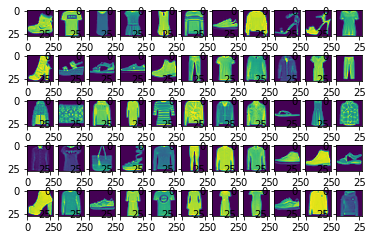

In [55]:
#plt.(20,20)
import matplotlib.pyplot as plt
for i in range(55):
    plt.subplot(5,11,i+1)
    plt.imshow(images[i].squeeze())
plt.show()

#ANALYZING CNN RESULTS / CONFUSION MATRIX

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
#from resources.plotcm import plot_confusion_matrix

In [57]:
# collecting maximum values from a batch
#-----------------------------------------------------------
try1 = []
for u in preds:
  try1.append(u.argmax(dim=0).tolist())
len(try1)

100

In [58]:
# COLLECTING ALL PREDICTED VALUES ------------BATCHWISE
try1 = []
for batch in train_loader:
  for u in preds:
    try1.append(u.argmax(dim=0).tolist())
len(try1)

60000

In [59]:
# COLLECTING ALL LABELLED VALUES ------------BATCHWISE
try2 = []
for batch in train_loader:
  for uu in labels:
    try2.append(uu.tolist())
len(try2)

60000

In [60]:
cm = confusion_matrix(try2, try1)
#print(type(cm))
#cm.dtype
cm

array([[7200,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 6600,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 5400,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 9000,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 5400,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 6600,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 6000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 4800,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 2400,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 6600]])

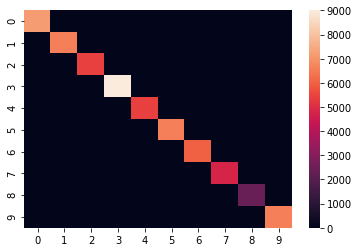

In [61]:
sns.heatmap(data = cm)

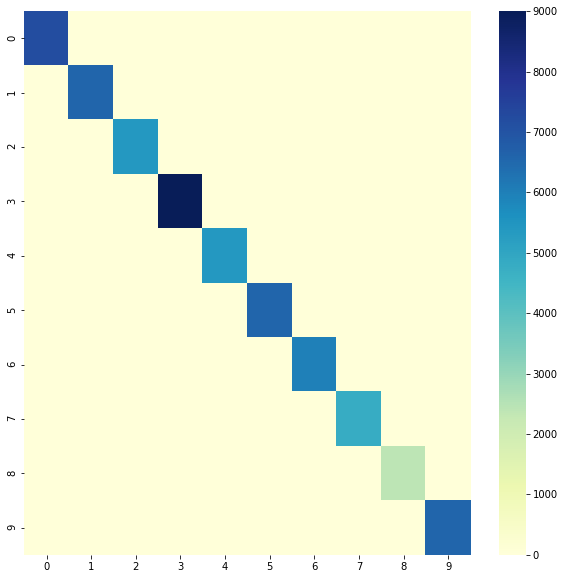

In [62]:
 names = (
    'T-shirt/top'
    ,'Trouser'
    ,'Pullover'
    ,'Dress'
    ,'Coat'
    ,'Sandal'
    ,'Shirt'
    ,'Sneaker'
    ,'Bag'
    ,'Ankle boot'
)
plt.figure(figsize=(10,10))
#plt.plot(data = cm)
sns.heatmap(cm, cmap ="YlGnBu")
#plot_confusion_matrix(datacm, names)

In [0]:
from sklearn.metrics import classification_report

In [64]:
print(classification_report(try1, try2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7200
           1       1.00      1.00      1.00      6600
           2       1.00      1.00      1.00      5400
           3       1.00      1.00      1.00      9000
           4       1.00      1.00      1.00      5400
           5       1.00      1.00      1.00      6600
           6       1.00      1.00      1.00      6000
           7       1.00      1.00      1.00      4800
           8       1.00      1.00      1.00      2400
           9       1.00      1.00      1.00      6600

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



**WORKING ON TEST DATA**

In [65]:
with torch.no_grad():
  batcht = next(iter(test_loader))
  imagest, labelst = batcht
  total_losst= 0
  total_correctt = 0
  for batch in test_loader:
    predst = network(imagest)
    losst = F.cross_entropy(predst, labelst)
    total_correctt+= get_num_correct(predst, labelst)
    total_losst+= losst.item()
    print( "Correct Predictions : ", total_correctt, "Total_Loss : ", total_losst)
#print("epoch : ", epoch, "Correct Predictions : ", total_correct, "   Total_Loss : ", total_loss)
accuracyt = total_correctt/len(test_set)
print ("Accuracy : ", accuracyt*100,"%")

Correct Predictions :  67 Total_Loss :  6.252974987030029
Correct Predictions :  134 Total_Loss :  12.505949974060059
Correct Predictions :  201 Total_Loss :  18.758924961090088
Correct Predictions :  268 Total_Loss :  25.011899948120117
Correct Predictions :  335 Total_Loss :  31.264874935150146
Correct Predictions :  402 Total_Loss :  37.517849922180176
Correct Predictions :  469 Total_Loss :  43.770824909210205
Correct Predictions :  536 Total_Loss :  50.023799896240234
Correct Predictions :  603 Total_Loss :  56.276774883270264
Correct Predictions :  670 Total_Loss :  62.52974987030029
Correct Predictions :  737 Total_Loss :  68.78272485733032
Correct Predictions :  804 Total_Loss :  75.03569984436035
Correct Predictions :  871 Total_Loss :  81.28867483139038
Correct Predictions :  938 Total_Loss :  87.54164981842041
Correct Predictions :  1005 Total_Loss :  93.79462480545044
Correct Predictions :  1072 Total_Loss :  100.04759979248047
Correct Predictions :  1139 Total_Loss :  106.

In [0]:
 '''
  with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
  '''    

In [77]:
'''
print('Finished Training')
PATH = '/content/drive/My Drive/Colab Notebooks/DATASETS/fashion-mnist_test.csv'
torch.save(network.state_dict(), PATH)

with torch.no_grad():
  total_loss_test= 0
  total_correct_test = 0
  preds_test = network(test_loader)
#CALCULATE LOSS
  loss_test = F.cross_entropy(preds_test, labels_test)
  total_correct_test += (preds_test.argmax(dim=1)==labels_test).sum()
   # total_correct_test+= get_num_correct_test(preds_test, labels_test)
  total_loss_test+= loss_test.item()

print("Correct Predictions in Test Data : ", total_correct_test, "   Total_Loss : ", total_loss_test)
#print("Accuracy = ")
'''

Finished Training


TypeError: ignored

torch.utils.data.dataloader.DataLoader

In [0]:
def get_num_correct_test(preds_test, labels_test):
  return preds_test.argmax(dim=1).eq(labels_test).sum().item()

In [0]:
total_correct_test+= get_num_correct(preds_test, labels_test)
total_loss_test+= loss_test.item()

In [0]:
print("Correct Predictions : ", total_correct_test, "   Total_Loss : ", total_loss_test)
accuracy_test = total_correct_test/len(test_dataset)
print ("Accuracy : ", accuracy_test)

In [0]:
# COLLECTING ALL LABELLED VALUES of test data ------------BATCHWISE
try4 = []
for batch in test_loader:
  for uu in labels_test:
    try4.append(uu.tolist())
len(try4)

In [0]:
# COLLECTING ALL predicted VALUES of test data ------------BATCHWISE
try3 = []
for batch in test_loader:
  for u in predicted:
    try3.append(u.argmax(dim=0).tolist())
len(try3)

In [0]:
cm_test = confusion_matrix(try4, try3)

In [0]:
cm_test

In [0]:
print(classification_report(try3, try4))

Correct Predictions :  69 Total_Loss :  5.643397808074951
Correct Predictions :  138 Total_Loss :  11.286795616149902
Correct Predictions :  207 Total_Loss :  16.930193424224854
Correct Predictions :  276 Total_Loss :  22.573591232299805
Correct Predictions :  345 Total_Loss :  28.216989040374756
Correct Predictions :  414 Total_Loss :  33.86038684844971
Correct Predictions :  483 Total_Loss :  39.50378465652466
Correct Predictions :  552 Total_Loss :  45.14718246459961
Correct Predictions :  621 Total_Loss :  50.79058027267456
Correct Predictions :  690 Total_Loss :  56.43397808074951
Correct Predictions :  759 Total_Loss :  62.07737588882446
Correct Predictions :  828 Total_Loss :  67.72077369689941
Correct Predictions :  897 Total_Loss :  73.36417150497437
Correct Predictions :  966 Total_Loss :  79.00756931304932
Correct Predictions :  1035 Total_Loss :  84.65096712112427
Correct Predictions :  1104 Total_Loss :  90.29436492919922
Correct Predictions :  1173 Total_Loss :  95.937762

Accuracy :  69.0 %
